In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
link ='https://docs.google.com/spreadsheets/d/e/2PACX-1vRHGS6bsVrGMim59XwypgY3SPIK5kJQnUrfMVid6kqjrC6JV3lKF0icQWPLMuQW_A/pub?output=xlsx'

In [ ]:
df = pd.read_excel(link)
df.head(13)

In [ ]:
len(df)

In [ ]:
#df['Month']= pd.to_datetime(df['Month'], dayfirst=False)
df['Period'] = pd.to_datetime(df['Period'],dayfirst=True)
df.dtypes

In [6]:
# 1 fecha como índice

df.set_index('Period',inplace=True)
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


In [7]:
df.shape

(64, 4)

In [8]:
# resetamos el índice
df2 = df.reset_index()
df2.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


# Redimensionando nuestra df, función melt

In [9]:
melt = df2.melt(id_vars=['Period'],var_name='Empresa',value_name='monto')
melt.head()

,Period,Empresa,monto
0,2015-01-01,Revenue,1.601007e+07
1,2015-02-01,Revenue,1.580759e+07
2,2015-03-01,Revenue,2.204715e+07
3,2015-04-01,Revenue,1.881458e+07
4,2015-05-01,Revenue,1.402148e+07


In [10]:
melt.Empresa.unique()

array(['Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'], dtype=object)

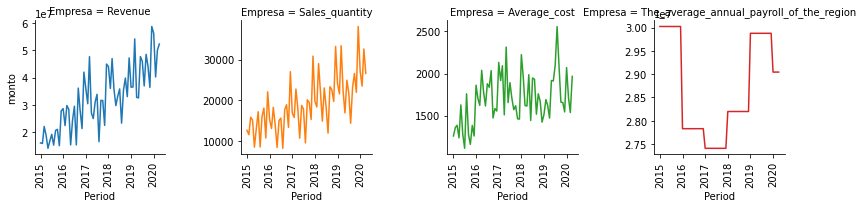

In [11]:
# Plot utilizando seaborn

g = sns.FacetGrid(melt, col="Empresa"
                      ,col_wrap = 4
                  ,sharex=False
                      ,sharey=False
                  ,hue='Empresa'
                  )
g.map(sns.lineplot, "Period", "monto")

# gira los elementos del eje _x

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [12]:
# agregando media

melt['media'] = melt.groupby('Empresa')['monto'].transform('mean')
melt['MA_4'] = melt.groupby('Empresa')['monto'].rolling(4).mean().reset_index(level=0,drop=True).shift(-1)
melt.head(10)

,Period,Empresa,monto,media,MA_4
0,2015-01-01,Revenue,1.601007e+07,3.236045e+07,NaN
1,2015-02-01,Revenue,1.580759e+07,3.236045e+07,NaN
2,2015-03-01,Revenue,2.204715e+07,3.236045e+07,1.816985e+07
3,2015-04-01,Revenue,1.881458e+07,3.236045e+07,1.767270e+07
4,2015-05-01,Revenue,1.402148e+07,3.236045e+07,1.791678e+07
5,2015-06-01,Revenue,1.678393e+07,3.236045e+07,1.719547e+07
6,2015-07-01,Revenue,1.916189e+07,3.236045e+07,1.629307e+07
7,2015-08-01,Revenue,1.520498e+07,3.236045e+07,1.793869e+07
8,2015-09-01,Revenue,2.060394e+07,3.236045e+07,1.899092e+07
9,2015-10-01,Revenue,2.099287e+07,3.236045e+07,1.794879e+07


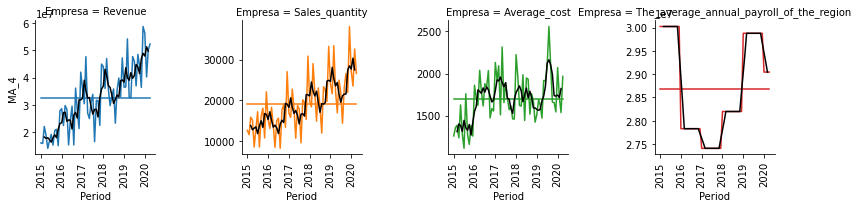

In [13]:
g = sns.FacetGrid(melt, col="Empresa"
                     ,col_wrap = 4
                      ,sharey=False
                      ,sharex=False
                  ,hue = 'Empresa' )
g.map(sns.lineplot, 'Period', "monto")   # original
g.map(sns.lineplot, "Period", "media")    # media simple
g.map(sns.lineplot, "Period", "MA_4",color ='k')  # MA (w = 4)

# esta parte hace la rotación por cada plot

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

In [14]:
import plotnine
from plotnine import ggplot, aes
from plotnine.geoms import geom_smooth
from plotnine.themes.elements import element_text
from plotnine.themes import theme

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


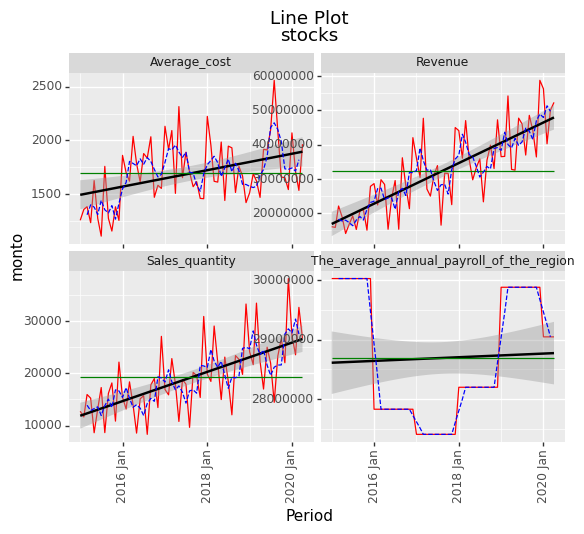

In [15]:
line_plot = ggplot(data=melt, mapping=aes(x='Period', y='monto'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='red') + 
 plotnine.geom_smooth(method ='lm') + # tendencia
 plotnine.geom_line(aes(x='Period',y='media'),color ='green') +  # media
 plotnine.geom_line(aes(x='Period',y='MA_4'),color ='blue',linetype = "dashed") + # media movil
 plotnine.facet_wrap('Empresa',scales='free',ncol = 2) +    # independiza los plots , hace un plot por cada symbol
 #plotnine.geom_smooth(method = 'lm') +
 plotnine.theme(axis_text_x= element_text(angle=90)) +
 plotnine.scale_x_date(date_labels ='%Y %b',breaks ='2 years') +
 # labels
 
 plotnine.labs(title='Line Plot\nstocks') 

 # add annotation to plot
 #plotnine.annotate('text', x=pd.Timestamp('2005-08-01'), y=45000, label='texto', color='darkred')
 ).draw();

# Modelo Arima de ventas

In [16]:
ventas = melt.loc[melt.Empresa =='Sales_quantity',['Period','monto']].dropna()
print(len(ventas))
ventas.head()

64


,Period,monto
64,2015-01-01,12729.0
65,2015-02-01,11636.0
66,2015-03-01,15922.0
67,2015-04-01,15227.0
68,2015-05-01,8620.0


In [17]:
ventas.tail()

,Period,monto
123,2019-12-01,38069.0
124,2020-01-01,27184.0
125,2020-02-01,23509.0
126,2020-03-01,32569.0
127,2020-04-01,26615.0


In [18]:
ventas.set_index('Period',inplace=True)
ventas.head()

,monto
Period,
2015-01-01,12729.0
2015-02-01,11636.0
2015-03-01,15922.0
2015-04-01,15227.0
2015-05-01,8620.0


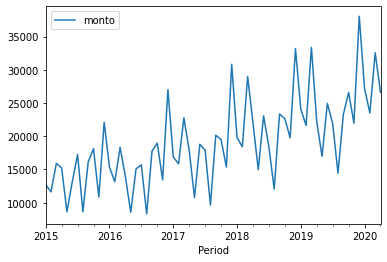

In [19]:
ventas.plot()

In [20]:
# arima automático

!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 8.4 MB/s 
     |████████████████████████████████| 9.8 MB 45.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Parentesis 
data de yahoo finance

https://algotrading101.com/learn/yfinance-guide/

In [22]:
# adicional para bajar data de yahoo finance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 6.4 MB 16.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [23]:
import yfinance # si desean data para analizar

In [24]:
# (data descargada de yfinance)
raw_data = yfinance.download(tickers ='^GSPC, ^FTSE, ^N225, ^GDAXI',start ='1994-01-07', end = '2020-03-20',
interval ='1d', group_by = 'ticker', auto_adjust =True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [25]:
raw_data.head()

^N225                                                   \
                    Open          High           Low         Close Volume   
Date                                                                        
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0   
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0   
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0   
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0   
1994-01-13  18770.380859  18823.380859  18548.750000  18577.259766    0.0   

                 ^GDAXI                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0   
1994-01-13  2171.500000  2183.709961  2134.100098  2142.370117    0.0   

                 ^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   
1994-01-13  474.170013  474.170013  471.799988  472.470001  277970000.0   

                  ^FTSE                                                
                   Open         High          Low        Close Volume  
Date                                                                   
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0  
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0  
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0  
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0  
1994-01-13  3380.699951  3383.300049  3356.899902  3360.000000    0.0

In [26]:
from pmdarima.arima import auto_arima

In [27]:
model_auto = auto_arima(ventas)

In [28]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   64
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -606.343
Date:                Sat, 04 Jun 2022   AIC                           1222.685
Time:                        14:37:36   BIC                           1233.401
Sample:                             0   HQIC                          1226.900
                                 - 64                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9858      0.032    -30.340      0.000      -1.050      -0.922
ar.L2         -0.9731      0.021    -47.408      0.000      -1.013      -0.933
ma.L1          0.7206      0.116      6.237      0.000       0.494       0.947
ma.L2          0.9783      0.289      3.385      0.001       0.412       1.545
sigma2      1.392e+07   2.14e-08   6.49e+14      0.000    1.39e+07    1.39e+07
===================================================================================
Ljung-Box (Q):                      109.23   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.00   Prob(JB):                         0.39
Heteroskedasticity (H):               0.96   Skew:                             0.36
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.25e+29. Standard errors may be unstable.
"""

In [29]:
import statsmodels.api as sm

In [30]:
# pronóstico model0
model0 = sm.tsa.statespace.SARIMAX(ventas['monto'],order = (2,1,2))
results = model0.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,


In [31]:
print(results.aic, results.bic)

1222.685205738989 1233.4008793709468


In [32]:
# le agrego la parte estacional manualmente
model1 = sm.tsa.statespace.SARIMAX(ventas['monto'],order = (2,1,2),seasonal_order=(1,1,1,12))
results1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


In [33]:
print(results1.aic, results1.bic)

913.3988316892321 926.9216111183024


In [34]:
# le agrego la parte estacional obtenida en Rstudio
model = sm.tsa.statespace.SARIMAX(ventas['monto'],order = (2,1,2),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.aic, results.bic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  periods=len(index) + 1,


910.422295095499 920.0814232591206


In [35]:
len(ventas)

64

In [36]:
# los parametros start y end deben ser <= (len(ventas))

ventas['forecast'] = results.predict(start = 52,end = 64, dynamic = True)

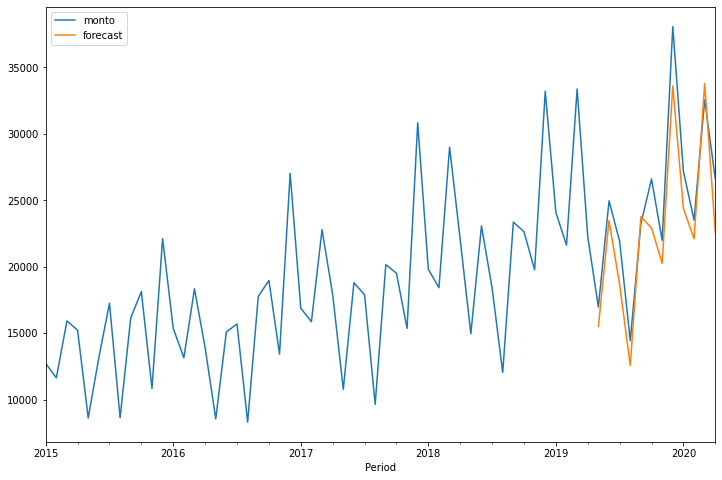

In [37]:
ventas[['monto','forecast']].plot(figsize=(12,8))

In [38]:
ventas

,monto,forecast
Period,,
2015-01-01,12729.0,NaN
2015-02-01,11636.0,NaN
2015-03-01,15922.0,NaN
2015-04-01,15227.0,NaN
2015-05-01,8620.0,NaN
...,...,...
2019-12-01,38069.0,33618.875924
2020-01-01,27184.0,24394.908666
2020-02-01,23509.0,22099.299368


In [39]:
# genero 24 fechas futuras para predecir
from pandas.tseries.offsets import DateOffset
future_dates = [ventas.index[-1] + DateOffset(months=x) for x in range (0,25)]
future_dates

[Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00')]

In [40]:
# genero los espacios para almacenar la predicción 
future_datest_df = pd.DataFrame(index = future_dates[1:],columns=ventas.columns)

In [41]:
future_datest_df

,monto,forecast
2020-05-01,NaN,NaN
2020-06-01,NaN,NaN
2020-07-01,NaN,NaN
2020-08-01,NaN,NaN
2020-09-01,NaN,NaN
2020-10-01,NaN,NaN
2020-11-01,NaN,NaN
2020-12-01,NaN,NaN
2021-01-01,NaN,NaN
2021-02-01,NaN,NaN


In [42]:
# concateno ambas tablas para graficar
future_df = pd.concat([ventas,future_datest_df])
future_df.head()

,monto,forecast
2015-01-01,12729.0,NaN
2015-02-01,11636.0,NaN
2015-03-01,15922.0,NaN
2015-04-01,15227.0,NaN
2015-05-01,8620.0,NaN


In [43]:
len(future_df)

88

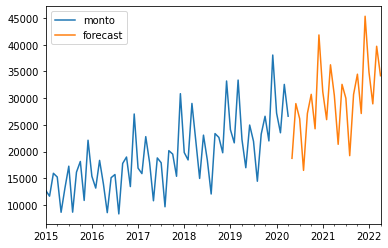

In [44]:
future_df['forecast'] = results.predict(start=64,end = 88,dynamic = True)
future_df[['monto','forecast']].plot()

In [45]:
future_df.tail(15)

,monto,forecast
2021-02-01,NaN,25970.863115
2021-03-01,NaN,36240.938923
2021-04-01,NaN,30530.365128
2021-05-01,NaN,21346.678831
2021-06-01,NaN,32575.971094
2021-07-01,NaN,29975.003445
2021-08-01,NaN,19222.390269
2021-09-01,NaN,30673.738284
2021-10-01,NaN,34479.599420
2021-11-01,NaN,27120.184146
